Chord Recognition Algorithm

Given a melody line, get the chromagraph and frequencies of the melody line pitches and create an accompanying chord prorgession

In [1]:
# General useful imports
import numpy as np
import matplotlib.pyplot as plt
import librosa 
import librosa.display
from IPython.display import Audio

from scipy import signal

%matplotlib inline


# Basic audio parameters

SR            = 22050                  #  sample rate default for Librosa

# Utility functions

# Round to 4 decimal places

def round4(x):
    return np.around(x,4)  

Code to read melody file and create a chromagraph

In [2]:
def displaySignal(x,sr=SR,title='Signal X',):
    plt.figure(figsize=(12,6))
    plt.title(title)
    #plt.ylim([-1.0,1.0])           # if you want the full range -1 .. 1, else will adapt to signal
    plt.plot([0,librosa.get_duration(x)],[0,0],linewidth=1,color='k') # if you want a 0 line
    plt.grid() # gridlines
    librosa.display.waveshow(x,sr=sr)
    plt.show()

In [4]:
# create a dictionary of piano key frequencies

# see https://en.wikipedia.org/wiki/Piano_key_frequencies

notenames = ['A0', 'Bb0', 'B0', 'C1', 'C#1', 'D1', 'Eb1', 'E1', 'F1', 'F#1', 'G1', 'Ab1', 
             'A1', 'Bb1', 'B1', 'C2', 'C#2', 'D2', 'Eb2', 'E2', 'F2', 'F#2', 'G2', 'Ab2', 
             'A2', 'Bb2', 'B2', 'C3', 'C#3', 'D3', 'Eb3', 'E3', 'F3', 'F#3', 'G3', 'Ab3', 
             'A3', 'Bb3', 'B3', 'C4', 'C#4', 'D4', 'Eb4', 'E4', 'F4', 'F#4', 'G4', 'Ab4', 
             'A4', 'Bb4', 'B4', 'C5', 'C#5', 'D5', 'Eb5', 'E5', 'F5', 'F#5', 'G5', 'Ab5',
             'A5', 'Bb5', 'B5', 'C6', 'C#6', 'D6', 'Eb6', 'E6', 'F6', 'F#6', 'G6', 'Ab6', 
             'A6', 'Bb6', 'B6', 'C7', 'C#7', 'D7', 'Eb7', 'E7', 'F7', 'F#7', 'G7', 'Ab7', 
             'A7', 'Bb7', 'B7', 'C8', 'R']

# Create chromatic scale, e.g., as on the piano, as a dictionary    

Freqs = {} 

f = 27.5

for name in notenames:
    Freqs[name] = f
    f *= 2**(1/12)

Freqs['R'] = 0                    # a rest (silence) 

# test

Freqs['C8']

4186.009044809592

In [9]:
y, sr = librosa.load("Chords.m4a")
stft = librosa.stft(y) # Short-Time Fourier Transform to represent a signal in the time-frequency domain

s = np.abs(stft**2) # Get magnitude of stft

/Users/linsywang/opt/anaconda3/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


[Text(0, 0.5, 'Default chroma')]

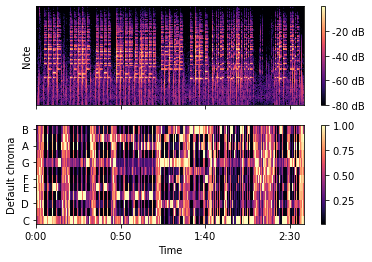

In [10]:
chroma_orig = librosa.feature.chroma_cqt(y=y, sr=SR)

# For display purposes, let's zoom in on a 15-second chunk from the middle of the song
# idx = tuple([slice(None), slice(*list(librosa.time_to_frames([45, 60])))])

# And for comparison, we'll show the CQT matrix as well.
C = np.abs(librosa.cqt(y=y, sr=sr, bins_per_octave=12*3, n_bins=7*12*3))
fig, ax = plt.subplots(nrows=2, sharex=True)
img1 = librosa.display.specshow(librosa.amplitude_to_db(C, ref=np.max),
                                    y_axis='cqt_note', x_axis='time', bins_per_octave=12*3,
                                    ax=ax[0])

fig.colorbar(img1, ax=[ax[0]], format="%+2.f dB")
ax[0].label_outer()
img2 = librosa.display.specshow(chroma_orig, y_axis='chroma', x_axis='time', ax=ax[1])
fig.colorbar(img2, ax=[ax[1]])
ax[1].set(ylabel='Default chroma')

/Users/linsywang/opt/anaconda3/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


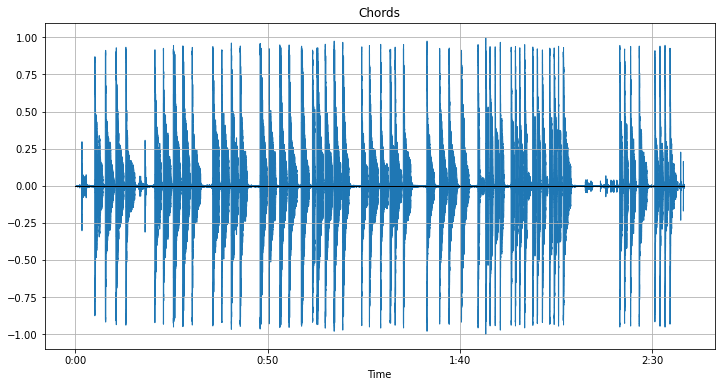

In [11]:
x, sr = librosa.load("Chords.m4a")

displaySignal(x, title="Chords")

Audio(x, rate=sr)